---

<p> Libreta n° 3 sobre el trabajo de investigación: </p>

<center>

<p> 
    <b> "Estimación de la evapotranspiración espacio-temporal en arrozales usando imágenes satelitales, Departamento de Lambayeque" 
    </b>
</p>

</center>

Autor: Cesar Francisco Vilca Gamarra 

Repositorio alojado en [GitHub](https://github.com/vilcagamarracf/Inv_arroz_METRIC) 

Marzo, 2022

---

# Sección iterativa y parámetro H

## Imports

In [1]:
import math
from funciones import *

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 30) # Visualizar máximo de 30 columnas

plt.rcParams['font.family'] = 'serif'  
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['figure.dpi'] = 72

ModuleNotFoundError: No module named 'funciones'

In [13]:
# ------------------------------------------------------------------------------------------------
# Pruebas: En caso de realizar alguna edición al archivo 'funciones.py' realizar lo siguiente:
# ------------------------------------------------------------------------------------------------

import importlib
import sys

importlib.reload(sys.modules['funciones']) # Importa las funciones del archivo con las modificaciones aplicadas
from funciones import *

## Desarrollo de la sección iterativa

N iteraciones: 27
Coeficientes finales:
 a: 0.11509
 b: -32.58494


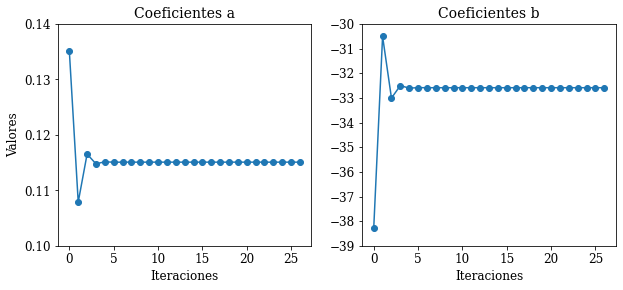

In [5]:
# Valores
pix_values_f = {
    'Ts_k': 290.869873,
    'Ts': 290.869873 - 273.15,
    'R_n': 529.7671931,
    'G':60.68105961,
    'Elev_m': 232.551712,
    'LAI': 1.968574,
    'Slope_d': 0
}

pix_values_c = {
    'Ts_k': 314.259521,
    'Ts': 314.259521 - 273.15,
    'R_n': 601.9251246,
    'G': 124.5408483,
    'Elev_m': 231.477097,
    'LAI': 0.022141,
    'Slope_d': 0
}

elev_station = 2.9 # m
dato_ws = 34.92    # km/hr
dato_et = 0.43     # mm/hr

# Parte iterativa: Iteracion 1 
resultados_f = []
resultados_c = []

pix_values_fpros = procesado_inicial(pix_values_f, elev_station, dato_ws, dato_et, Kc=1.05)
pix_values_cpros = procesado_inicial(pix_values_c, elev_station, dato_ws, dato_et, Kc=0)

pix_f_procesado, pix_c_procesado = get_H(pix_values_fpros, pix_values_cpros)

u_200 = 17.780523937825766 # m/s

pix_f_stability_cor = stability_corr(pix_f_procesado)
pix_c_stability_cor = stability_corr(pix_c_procesado)

resultados_f.append({**{'iter':1}, **pix_f_procesado, **pix_f_stability_cor})
resultados_c.append({**{'iter':1}, **pix_c_procesado, **pix_c_stability_cor})

# Parte iterativa: N Iteraciones 
x = 0
n_iter = 27

while x < n_iter-1:

    pix_f_iter = iteracion(u_200, resultados_f[-1], pix_values_f, pix_values_fpros['H0'])
    pix_c_iter = iteracion(u_200, resultados_c[-1], pix_values_c, pix_values_cpros['H0'])

    pix_f_post_iter, pix_c_post_iter = get_H(pix_f_iter, pix_c_iter)

    pix_f_stability_cor = stability_corr(pix_f_post_iter)
    pix_c_stability_cor = stability_corr(pix_c_post_iter)

    resultados_f.append({**{'iter':x+2}, **pix_f_post_iter, **pix_f_stability_cor})
    resultados_c.append({**{'iter':x+2}, **pix_c_post_iter, **pix_c_stability_cor})
    
    x+=1

# Valores de coeficientes
coefs_a = []
coefs_b = []

for coefs in resultados_f:
    coefs_a.append(coefs['a_coef'])
    coefs_b.append(coefs['b_coef'])

# Grafica
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axs[0].plot(coefs_a, '-o')
axs[0].set(title='Coeficientes a', ylabel='Valores', xlabel='Iteraciones')
axs[0].set_ylim([0.1, 0.14])
axs[0].set_yticks([0.1, 0.11, 0.12, 0.13, 0.14])
axs[1].plot(coefs_b, '-o')
axs[1].set(title='Coeficientes b',xlabel='Iteraciones')
axs[1].set_ylim([-39, -30]);

print(f'N iteraciones: {n_iter}')
print(f'Coeficientes finales:\n a: {coefs_a[-1]:.5}\n b: {coefs_b[-1]:.7}')

In [3]:
resultados_f_df = pd.DataFrame(resultados_f)
columnas = ['u*', 'r_ah', 'air_dens_p', 'dT0', 'dT1', 'H1', 'a_coef', 'b_coef', 'L', 'y200m', 'yhz2', 'yhz1']
resultados_f_df#[columnas]

,iter,Ts_k,Ts_dem,Z_om,u_200,u*,r_ah,air_dens_p,R_n,G,LE,H0,dT0,dT1,H1,a_coef,b_coef,L,y200m,yhz2,yhz1
0,1,290.869873,292.362609,0.035434,17.780524,0.843909,8.658120,1.160130,529.767193,60.68106,308.422296,160.663837,1.194267,1.194267,160.663837,0.135064,-38.293475,-315.104584,0.897803,0.048945,0.002534
1,2,290.869873,292.362609,0.035434,NaN,0.941791,7.638072,1.174045,NaN,NaN,NaN,NaN,1.041079,1.041079,160.663837,0.107886,-30.500782,-443.209881,0.750682,0.035160,0.001803
2,3,290.869873,292.362609,0.035434,NaN,0.924225,7.817693,1.173424,NaN,NaN,NaN,NaN,1.066125,1.066125,160.663837,0.116537,-33.005018,-418.647947,0.774234,0.037167,0.001908
3,4,290.869873,292.362609,0.035434,NaN,0.926992,7.789348,1.173526,NaN,NaN,NaN,NaN,1.062167,1.062167,160.663837,0.114788,-32.497483,-422.457174,0.770464,0.036841,0.001891
4,5,290.869873,292.362609,0.035434,NaN,0.926548,7.793895,1.173510,NaN,NaN,NaN,NaN,1.062802,1.062802,160.663837,0.115150,-32.602892,-421.844450,0.771068,0.036893,0.001894
5,6,290.869873,292.362609,0.035434,NaN,0.926619,7.793167,1.173512,NaN,NaN,NaN,NaN,1.062700,1.062700,160.663837,0.115076,-32.581257,-421.942441,0.770971,0.036885,0.001893
6,7,290.869873,292.362609,0.035434,NaN,0.926608,7.793284,1.173512,NaN,NaN,NaN,NaN,1.062717,1.062717,160.663837,0.115091,-32.585687,-421.926755,0.770987,0.036886,0.001893
7,8,290.869873,292.362609,0.035434,NaN,0.926610,7.793265,1.173512,NaN,NaN,NaN,NaN,1.062714,1.062714,160.663837,0.115088,-32.584783,-421.929266,0.770984,0.036886,0.001893
8,9,290.869873,292.362609,0.035434,NaN,0.926610,7.793268,1.173512,NaN,NaN,NaN,NaN,1.062714,1.062714,160.663837,0.115089,-32.584967,-421.928864,0.770984,0.036886,0.001893
9,10,290.869873,292.362609,0.035434,NaN,0.926610,7.793268,1.173512,NaN,NaN,NaN,NaN,1.062714,1.062714,160.663837,0.115089,-32.584929,-421.928928,0.770984,0.036886,0.001893


In [4]:
resultados_f[0]

{'iter': 1,
 'Ts_k': 290.869873,
 'Ts_dem': 292.362609128,
 'Z_om': 0.035434332,
 'u_200': 17.780523937825766,
 'u*': 0.8439088277210368,
 'r_ah': 8.658120216102656,
 'air_dens_p': 1.1601300527484308,
 'R_n': 529.7671931,
 'G': 60.68105961,
 'LE': 308.42229625655,
 'H0': 160.66383723345,
 'dT0': 1.1942667933421582,
 'dT1': 1.194266793342159,
 'H1': 160.66383723345012,
 'a_coef': 0.13506426891232076,
 'b_coef': -38.293475265829755,
 'L': -315.10458423853044,
 'y200m': 0.8978031819307253,
 'yhz2': 0.04894540039376864,
 'yhz1': 0.002534018922745642}

## Desarrollo de función `parte_iterativa`

In [2]:
def parte_iterativa(n_iteraciones, 
                    elev_station,
                    pix_f_values, pix_c_values, 
                    dato_ws, dato_et):
    
    '''
    Realizar primera y n iteraciones que se indique. 

    Retorna diccionario con información de iteraciones. 
    - Temperatura y Temperatura corregida por dem
    - Z_om, u_200, u*, r_ah, air_dens
    - Coeficientes a y b
    - Valores de corrección por estabilidad L, y200m, yhz2, yhz1
    '''

    # Establecer listas de inicio
    resultados_f = []
    resultados_c = []

    # 1er Iteración: Condición atmostférica neutral

    pix_f_procesadoinicial = procesado_inicial(pix_f_values, elev_station, dato_ws, dato_et, Kc=1.05)
    pix_c_procesadoinicial = procesado_inicial(pix_c_values, elev_station, dato_ws, dato_et, Kc=0) 

    u_200 = pix_f_procesadoinicial['u_200']

    pix_f_procesado, pix_c_procesado = get_H(pix_f_procesadoinicial, pix_c_procesadoinicial)

    pix_f_stability_cor = stability_corr(pix_f_procesado)
    pix_c_stability_cor = stability_corr(pix_c_procesado)
    
    resultados_f.append({**{'iter':1}, **pix_f_procesado, **pix_f_stability_cor})
    resultados_c.append({**{'iter':1}, **pix_c_procesado, **pix_c_stability_cor})

    # Parte iterativa: N Iteraciones 
    x = 0

    while x < n_iteraciones-1:

        pix_f_iter = iteracion(u_200, resultados_f[-1], pix_f_values, pix_f_procesadoinicial['H0'])
        pix_c_iter = iteracion(u_200, resultados_c[-1], pix_c_values, pix_c_procesadoinicial['H0'])

        pix_f_post_iter, pix_c_post_iter = get_H(pix_f_iter, pix_c_iter)

        pix_f_stability_cor = stability_corr(pix_f_post_iter)
        pix_c_stability_cor = stability_corr(pix_c_post_iter)

        resultados_f.append({**{'iter':x+2}, **pix_f_post_iter, **pix_f_stability_cor})
        resultados_c.append({**{'iter':x+2}, **pix_c_post_iter, **pix_c_stability_cor})

        x+=1

    return resultados_f, resultados_c

## Comprobación

Se realiza las iteraciones hasta que se estabilicen los valores de dT y rah del pixel caliente.

### Caso de Excel

#### Caso 1

In [6]:
# 1. Valores de caso en excel
pix_f_values = {
    'Ts_k': 290.869873,
    'R_n': 529.7671931,
    'G':60.68105961,
    'Elev_m': 232.551712,
    'LAI': 1.968574,
    'Slope_d': 0
}

pix_c_values = {
    'Ts_k': 314.259521,
    'R_n': 601.9251246,
    'G': 124.5408483,
    'Elev_m': 231.477097,
    'LAI': 0.022141,
    'Slope_d': 0
}

elev_station = 2.9 # m
dato_ws = 34.92    # km/hr
dato_et = 0.43     # mm/hr

n_iteraciones = 27

# Parte iterativa
list_f, list_c = parte_iterativa(n_iteraciones, 
                                 elev_station,
                                 pix_f_values, pix_c_values, 
                                 dato_ws, dato_et)

# Coeficientes
coef_a = list_f[-1]['a_coef']
coef_b = list_f[-1]['b_coef']
print(f'coef a: {coef_a}\ncoef b: {coef_b}')

# Visualizar resultados
list_f_df = pd.DataFrame(list_f)
list_c_df = pd.DataFrame(list_c)
display(list_c_df)

coef a: 0.11508875997193556
coef b: -32.584935796000615


,iter,Ts_k,Ts_dem,Z_om,u_200,u*,r_ah,air_dens_p,R_n,G,LE,H0,dT0,a_coef,b_coef,dT1,H1,L,y200m,yhz2,yhz1
0,1,314.259521,315.745272,0.005,17.780524,0.687956,10.620836,1.160276,601.925125,124.540848,0.0,477.384276,4.352429,0.135064,-38.293475,4.352429,477.384276,-62.078886,1.783647,0.218646,0.012764
1,2,314.259521,315.745272,0.005,NaN,0.827190,8.226057,1.097539,NaN,NaN,NaN,NaN,3.563743,0.107886,-30.500782,3.563743,477.384276,-102.079084,1.482720,0.140985,0.007791
2,3,314.259521,315.745272,0.005,NaN,0.799877,8.728590,1.094752,NaN,NaN,NaN,NaN,3.791077,0.116537,-33.005018,3.791077,477.384276,-92.063511,1.543225,0.154714,0.008634
3,4,314.259521,315.745272,0.005,NaN,0.805223,8.631607,1.095554,NaN,NaN,NaN,NaN,3.746211,0.114788,-32.497483,3.746211,477.384276,-93.990457,1.531003,0.151868,0.008458
4,5,314.259521,315.745272,0.005,NaN,0.804138,8.651360,1.095396,NaN,NaN,NaN,NaN,3.755327,0.115150,-32.602892,3.755327,477.384276,-93.597290,1.533473,0.152440,0.008493
5,6,314.259521,315.745272,0.005,NaN,0.804357,8.647375,1.095428,NaN,NaN,NaN,NaN,3.753487,0.115076,-32.581257,3.753487,477.384276,-93.676581,1.532974,0.152324,0.008486
6,7,314.259521,315.745272,0.005,NaN,0.804312,8.648181,1.095421,NaN,NaN,NaN,NaN,3.753859,0.115091,-32.585687,3.753859,477.384276,-93.660552,1.533075,0.152348,0.008487
7,8,314.259521,315.745272,0.005,NaN,0.804321,8.648018,1.095423,NaN,NaN,NaN,NaN,3.753783,0.115088,-32.584783,3.753783,477.384276,-93.663791,1.533054,0.152343,0.008487
8,9,314.259521,315.745272,0.005,NaN,0.804320,8.648051,1.095423,NaN,NaN,NaN,NaN,3.753799,0.115089,-32.584967,3.753799,477.384276,-93.663137,1.533058,0.152344,0.008487
9,10,314.259521,315.745272,0.005,NaN,0.804320,8.648044,1.095423,NaN,NaN,NaN,NaN,3.753796,0.115089,-32.584929,3.753796,477.384276,-93.663269,1.533058,0.152344,0.008487


In [4]:
# Comprobación de coeficiente b 
# b = dT_hot - a*Ts_hot
print(3.753796 - 0.115089*315.745272) # Temperatura en K 
print(3.753796 - 0.115089*(315.745272-273.15)) # Temperatura en °C

-32.585011609207996
-1.1484512592080027


coef a: 0.11508875997193556
coef b: -32.584935796000615


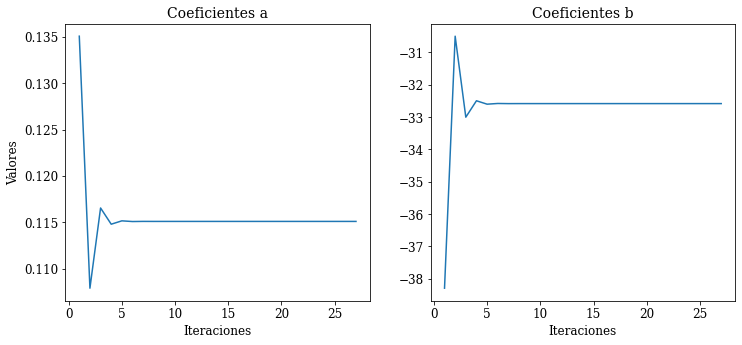

In [5]:
# Grafica
print(f'coef a: {coef_a}\ncoef b: {coef_b}')

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axs[0].plot(list_c_df['iter'], list_c_df['a_coef'])
# axs[0].axhline(0, color='black', alpha=.2)
axs[0].set(title='Coeficientes a', ylabel='Valores', xlabel='Iteraciones')
axs[1].plot(list_c_df['iter'], list_c_df['b_coef'])
# axs[1].axhline(0, color='black', alpha=.2)
axs[1].set(title='Coeficientes b',xlabel='Iteraciones');

#### Caso 2: Excel usado por Roxanna

In [2]:
# 1. Valores de caso en excel
pix_f_values = {
    'Ts_k': 296.760,
    'R_n': 349.9748559,
    'G': 17.87641696,
    'Elev_m': 49,
    'LAI': 9.821,
    'Slope_d': 0
}

pix_c_values = {
    'Ts_k': 308.148,
    'R_n': 449.7026826,
    'G': 100.7529501,
    'Elev_m': 49,
    'LAI': 0.251,
    'Slope_d': 0
}

elev_station = 2.5 # m
dato_ws = 5.616    # km/hr
dato_et = 0.406    # mm/hr

n_iteraciones = 27

# Parte iterativa
list_f, list_c = parte_iterativa(n_iteraciones, 
                                 elev_station,
                                 pix_f_values, pix_c_values, 
                                 dato_ws, dato_et)

# Coeficientes
coef_a = list_f[-1]['a_coef']
coef_b = list_f[-1]['b_coef']
print(f'coef a: {coef_a}\ncoef b: {coef_b}')

# Visualizar resultados
list_f_df = pd.DataFrame(list_f)
list_c_df = pd.DataFrame(list_c)
display(list_c_df)

coef a: 0.3835352508933409
coef b: -113.00542720695988


,iter,Ts_k,Ts_dem,Z_om,u_200,u*,r_ah,air_dens_p,R_n,G,LE,H0,dT0,a_coef,b_coef,dT1,H1,L,y200m,yhz2,yhz1
0,1,308.148,308.45025,0.005,2.945572,0.113969,64.111153,1.185313,449.702683,100.75295,0.0,348.949732,18.798784,1.517235,-449.192833,18.798784,348.949733,-0.386783,5.789968,3.248775,0.981099
1,2,308.148,308.45025,0.005,NaN,0.251252,7.067595,1.200883,NaN,NaN,NaN,NaN,2.045503,0.122203,-35.648085,2.045503,348.949733,-4.198620,3.747151,1.354162,0.167940
2,3,308.148,308.45025,0.005,NaN,0.176318,25.031199,1.135157,NaN,NaN,NaN,NaN,7.663987,0.580935,-171.525569,7.663987,348.949732,-1.371577,4.680237,2.174640,0.423694
3,4,308.148,308.45025,0.005,NaN,0.204125,14.873555,1.156383,NaN,NaN,NaN,NaN,4.470359,0.315552,-92.861715,4.470359,348.949733,-2.168040,4.292164,1.820493,0.295400
4,5,308.148,308.45025,0.005,NaN,0.191560,18.724804,1.144221,NaN,NaN,NaN,NaN,5.687696,0.415983,-122.622450,5.687696,348.949732,-1.772973,4.461682,1.973309,0.347309
5,6,308.148,308.45025,0.005,NaN,0.196853,16.971089,1.148827,NaN,NaN,NaN,NaN,5.134337,0.370158,-109.041028,5.134337,348.949733,-1.931785,4.389197,1.907582,0.324346
6,7,308.148,308.45025,0.005,NaN,0.194554,17.707713,1.146729,NaN,NaN,NaN,NaN,5.366992,0.389404,-114.744863,5.366992,348.949733,-1.861493,4.420480,1.935880,0.334115
7,8,308.148,308.45025,0.005,NaN,0.195540,17.387342,1.147610,NaN,NaN,NaN,NaN,5.265845,0.381029,-112.262567,5.265845,348.949733,-1.891375,4.407033,1.923703,0.329889
8,9,308.148,308.45025,0.005,NaN,0.195115,17.524601,1.147227,NaN,NaN,NaN,NaN,5.309188,0.384618,-113.326378,5.309188,348.949733,-1.878447,4.412823,1.928944,0.331704
9,10,308.148,308.45025,0.005,NaN,0.195298,17.465413,1.147391,NaN,NaN,NaN,NaN,5.290499,0.383070,-112.867452,5.290499,348.949732,-1.883998,4.410332,1.926688,0.330922


In [5]:
display(list_f_df)

,iter,Ts_k,Ts_dem,Z_om,u_200,u*,r_ah,air_dens_p,R_n,G,LE,H0,dT0,a_coef,b_coef,dT1,H1,L,y200m,yhz2,yhz1
0,1,296.76,297.06225,0.176778,2.945572,0.171761,42.539630,1.185313,349.974856,17.876417,289.561954,42.536485,1.520508,1.517235,-449.192833,1.520508,42.536485,-10.460053,3.029385,0.820746,0.072433
1,2,296.76,297.06225,0.176778,NaN,0.301786,18.163580,1.176924,NaN,NaN,NaN,NaN,0.653854,0.122203,-35.648085,0.653854,42.536485,-56.333879,1.845115,0.237534,0.014052
2,3,296.76,297.06225,0.176778,NaN,0.232871,29.035738,1.173479,NaN,NaN,NaN,NaN,1.048299,0.580935,-171.525569,1.048299,42.536485,-25.807586,2.368215,0.443601,0.030302
3,4,296.76,297.06225,0.176778,NaN,0.258995,24.319447,1.175045,NaN,NaN,NaN,NaN,0.876854,0.315552,-92.861715,0.876854,42.536485,-35.551140,2.147609,0.346600,0.022132
4,5,296.76,297.06225,0.176778,NaN,0.247295,26.346134,1.174364,NaN,NaN,NaN,NaN,0.950478,0.415983,-122.622450,0.950478,42.536485,-30.929706,2.242546,0.386519,0.025377
5,6,296.76,297.06225,0.176778,NaN,0.252198,25.479281,1.174656,NaN,NaN,NaN,NaN,0.918976,0.370158,-109.041028,0.918976,42.536485,-32.814179,2.202038,0.369150,0.023946
6,7,296.76,297.06225,0.176778,NaN,0.250083,25.850254,1.174531,NaN,NaN,NaN,NaN,0.932456,0.389404,-114.744863,0.932456,42.536485,-31.991928,2.219386,0.376527,0.024550
7,8,296.76,297.06225,0.176778,NaN,0.250984,25.691577,1.174585,NaN,NaN,NaN,NaN,0.926690,0.381029,-112.262567,0.926690,42.536485,-32.340661,2.211968,0.373361,0.024290
8,9,296.76,297.06225,0.176778,NaN,0.250598,25.759460,1.174562,NaN,NaN,NaN,NaN,0.929156,0.384618,-113.326378,0.929156,42.536485,-32.190934,2.215142,0.374714,0.024401
9,10,296.76,297.06225,0.176778,NaN,0.250763,25.730422,1.174571,NaN,NaN,NaN,NaN,0.928101,0.383070,-112.867452,0.928101,42.536485,-32.254884,2.213785,0.374135,0.024353


### Datos propios

#### 2022-01-13

In [3]:
# Procesando imagen 2022-01-13
pix_f_values = {'Albedo': 0.12827376471033497,
 'Elev_m': 46,
 'G': 98.56008630383153,
 'LAI': 1.00888777350927,
 'NDVI': 0.43160180390846825,
 'R_n': 630.1278162547657,
 'SAVI': 0.23416074179539104,
 'Slope_d': 2.630251407623291,
 'T_sw': 0.671105059235324,
 'Ts_c': 18.29602082685659,
 'Ts_k': 291.44602082685657,
 'e_0': 0.9600888777350927}

pix_c_values = {'Albedo': 0.1729629814053416,
 'Elev_m': 45,
 'G': 95.44079810337884,
 'LAI': 0.37526507397182696,
 'NDVI': 0.13498973596658878,
 'R_n': 579.2178904082016,
 'SAVI': 0.08112945597048568,
 'Slope_d': 2.075801134109497,
 'T_sw': 0.671217857822568,
 'Ts_c': 25.992497393938834,
 'Ts_k': 299.1424973939388,
 'e_0': 0.9537526507397183}

elev_station = 2.9 # m
dato_ws = 1.6      # km/hr
dato_et = 0.3     # mm/hr

n_iteraciones = 40

# Parte iterativa
list_f, list_c = parte_iterativa(n_iteraciones, 
                                 elev_station,
                                 pix_f_values, pix_c_values, 
                                 dato_ws, dato_et)

# Coeficientes
coef_a = list_f[-1]['a_coef']
coef_b = list_f[-1]['b_coef']
print(f'coef a: {coef_a}\ncoef b: {coef_b}')

# Resultados
list_f_df = pd.DataFrame(list_f)
list_c_df = pd.DataFrame(list_c)
display(list_c_df)

coef a: 0.12293365290287285
coef b: -31.8874498303256


,iter,Ts_k,Ts_dem,Z_om,u_200,u*,r_ah,air_dens_p,R_n,G,LE,H0,dT0,a_coef,b_coef,dT1,H1,L,y200m,yhz2,yhz1
0,1,299.142497,299.416147,0.006755,0.814686,0.032442,225.219543,1.185867,579.21789,95.440798,0.0,483.777092,91.512800,4.861624,-1364.135912,91.512800,483.777092,-0.006250,9.645358,7.182546,4.283783
1,2,299.142497,299.416147,0.006755,NaN,0.513511,0.460578,1.674311,NaN,NaN,NaN,NaN,0.132550,0.007849,-2.217602,0.132550,483.777092,-34.994429,2.158292,0.350954,0.022478
2,3,299.142497,299.416147,0.006755,NaN,0.041047,158.489105,1.162626,NaN,NaN,NaN,NaN,65.685714,2.290056,-619.994087,65.685714,483.777092,-0.012411,8.987370,6.508018,3.648819
3,4,299.142497,299.416147,0.006755,NaN,0.255279,1.304482,1.489084,NaN,NaN,NaN,NaN,0.422115,0.034149,-9.802506,0.422115,483.777092,-3.823669,3.823105,1.416500,0.182408
4,5,299.142497,299.416147,0.006755,NaN,0.051604,83.261847,1.163753,NaN,NaN,NaN,NaN,34.474404,-0.632280,223.789149,34.474404,483.777092,-0.024685,8.333025,5.836534,3.033047
5,6,299.142497,299.416147,0.006755,NaN,0.170176,2.755327,1.313482,NaN,NaN,NaN,NaN,1.010789,0.089567,-25.806999,1.010789,483.777092,-0.999155,4.953222,2.431877,0.534605
6,7,299.142497,299.416147,0.006755,NaN,0.062520,42.852782,1.166051,NaN,NaN,NaN,NaN,17.708145,-1.391636,434.386528,17.708145,483.777092,-0.043984,7.788150,5.277501,2.537739
7,8,299.142497,299.416147,0.006755,NaN,0.133200,4.687077,1.235232,NaN,NaN,NaN,NaN,1.828374,0.160295,-46.166643,1.828374,483.777092,-0.450580,5.653613,3.113431,0.897881
8,9,299.142497,299.416147,0.006755,NaN,0.071953,26.446156,1.169258,NaN,NaN,NaN,NaN,10.898431,-1.054656,326.679454,10.898431,483.777092,-0.067231,7.391094,4.870698,2.190481
9,10,299.142497,299.416147,0.006755,NaN,0.114992,6.692172,1.206050,NaN,NaN,NaN,NaN,2.673704,0.219433,-63.028073,2.673704,483.777092,-0.283064,6.070670,3.529352,1.164002


In [5]:
display(list_f_df)

,iter,Ts_k,Ts_dem,Z_om,u_200,u*,r_ah,air_dens_p,R_n,G,LE,H0,dT0,a_coef,b_coef,dT1,H1,L,y200m,yhz2,yhz1
0,1,291.446021,291.726171,0.01816,0.814686,0.035890,203.585953,1.185728,630.127816,98.560086,215.059372,316.508358,54.127026,4.861624,-1364.135912,54.127026,316.508358,-0.012599,8.972948,6.493223,3.635055
1,2,291.446021,291.726171,0.01816,NaN,1.000350,0.335404,1.464679,NaN,NaN,NaN,NaN,0.072190,0.007849,-2.217602,0.072190,316.508358,-337.017459,0.867642,0.045869,0.002370
2,3,291.446021,291.726171,0.01816,NaN,0.039580,181.925851,1.192956,NaN,NaN,NaN,NaN,48.075235,2.290056,-619.994087,48.075235,316.508358,-0.017002,8.687145,6.199973,3.363947
3,4,291.446021,291.726171,0.01816,NaN,0.538999,0.722690,1.428258,NaN,NaN,NaN,NaN,0.159513,0.034149,-9.802506,0.159513,316.508358,-51.407139,1.903814,0.256581,0.015383
4,5,291.446021,291.726171,0.01816,NaN,0.045119,148.901891,1.193314,NaN,NaN,NaN,NaN,39.336620,-0.632280,223.789149,39.336620,316.508358,-0.025194,8.313693,5.816693,3.015165
5,6,291.446021,291.726171,0.01816,NaN,0.336322,1.408379,1.378751,NaN,NaN,NaN,NaN,0.322022,0.089567,-25.806999,0.322022,316.508358,-12.056048,2.921916,0.751121,0.063278
6,7,291.446021,291.726171,0.01816,NaN,0.052314,107.600339,1.193980,NaN,NaN,NaN,NaN,28.409795,-1.391636,434.386528,28.409795,316.508358,-0.039292,7.894186,5.386245,2.632593
7,8,291.446021,291.726171,0.01816,NaN,0.236447,2.497126,1.321477,NaN,NaN,NaN,NaN,0.595707,0.160295,-46.166643,0.595707,316.508358,-4.015288,3.783350,1.383752,0.174714
8,9,291.446021,291.726171,0.01816,NaN,0.060473,72.062056,1.195103,NaN,NaN,NaN,NaN,19.008710,-1.054656,326.679454,19.008710,316.508358,-0.060749,7.485707,4.967562,2.271999
9,10,291.446021,291.726171,0.01816,NaN,0.183413,3.991651,1.275876,NaN,NaN,NaN,NaN,0.986270,0.219433,-63.028073,0.986270,316.508358,-1.809468,4.444440,1.957624,0.341742


coef a: 0.12293365290287285
coef b: -31.8874498303256


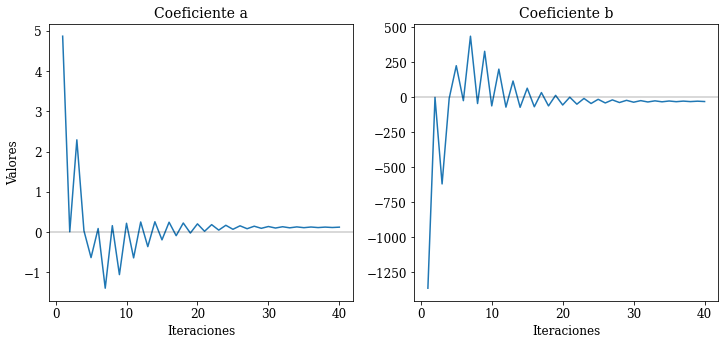

In [4]:
# Grafica
print(f'coef a: {coef_a}\ncoef b: {coef_b}')

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axs[0].plot(list_c_df['iter'], list_c_df['a_coef'])
axs[0].axhline(0, color='black', alpha=.2)
axs[0].set(title='Coeficiente a', ylabel='Valores', xlabel='Iteraciones')

axs[1].plot(list_c_df['iter'], list_c_df['b_coef'])
axs[1].axhline(0, color='black', alpha=.2)
axs[1].set(title='Coeficiente b',xlabel='Iteraciones') ;

#### 2022-01-29 (Error)

Notas
- Despues de 6 iteraciones empieza a fallar el modelo
- H se vuelve 0 y L -1000 en la iteracion 4
- H0 de pixel frío resulta negativo

In [5]:
# Procesando imagen 2022-01-29
pix_f_values = {'Albedo': 0.190847786429444,
 'Elev_m': 46,
 'G': 70.49290096680541,
 'LAI': 1.5653886222685907,
 'NDVI': 0.6921115168376513,
 'R_n': 543.8013354581973,
 'SAVI': 0.4662258899084076,
 'Slope_d': 2.7987983226776123,
 'T_sw': 0.6711848548380892,
 'Ts_c': 15.48396223807515,
 'Ts_k': 288.6339622380751,
 'e_0': 0.9656538862226859}

pix_c_values = {'Albedo': 0.13716365099530076,
 'Elev_m': 45,
 'G': 83.83517674696029,
 'LAI': 0.41000200789993424,
 'NDVI': 0.15125082290980912,
 'R_n': 600.0480830584637,
 'SAVI': 0.08275036791056542,
 'Slope_d': 0.9274099469184875,
 'T_sw': 0.6712322363486736,
 'Ts_c': 18.572854316694077,
 'Ts_k': 291.72285431669405,
 'e_0': 0.9541000200789993}

elev_station = 2.9 # m
dato_ws = 1.6      # km/hr
dato_et = 0.69     # mm/hr

n_iteraciones = 6

# Parte iterativa
list_f, list_c = parte_iterativa(n_iteraciones, 
                                 elev_station,
                                 pix_f_values, pix_c_values, 
                                 dato_ws, dato_et)

# Coeficientes
coef_a = list_f[-1]['a_coef']
coef_b = list_f[-1]['b_coef']
print(f'coef a: {coef_a}\ncoef b: {coef_b}')

# Resultados
list_f_df = pd.DataFrame(list_f)
list_c_df = pd.DataFrame(list_c)
display(list_c_df)

coef a: inf
coef b: -inf


,iter,Ts_k,Ts_dem,Z_om,u_200,u*,r_ah,air_dens_p,R_n,G,LE,H0,dT0,a_coef,b_coef,dT1,H1,L,y200m,yhz2,yhz1
0,1,291.722854,291.996504,0.00738,0.814686,0.032724,223.282976,1.185867,600.048083,83.835177,0.0,516.212906,96.808824,3.260509e+01,-9.423764e+03,96.808824,516.212906,-0.005862,9.707084,7.245768,4.343951
1,2,291.722854,291.996504,0.00738,NaN,0.667762,0.343031,1.783539,NaN,NaN,NaN,NaN,0.098889,1.319849e+02,-3.853903e+04,0.098889,516.212906,-74.915205,1.667137,0.185736,0.010594
2,3,291.722854,291.996504,0.00738,NaN,0.039112,175.892741,1.192072,NaN,NaN,NaN,NaN,75.864842,2.055329e+07,-6.001489e+09,75.864842,516.212906,-0.010061,9.188173,6.713972,3.841209
3,4,291.722854,291.996504,0.00738,NaN,0.327754,0.915095,1.610488,NaN,NaN,NaN,NaN,0.292148,2.186427e+27,-6.384291e+29,0.000000,0.000000,-1000.000000,0.461260,0.015811,0.000800
4,5,291.722854,291.996504,0.00738,NaN,0.034273,212.124652,1.192863,NaN,NaN,NaN,NaN,91.431508,3.069501e+102,-8.962835e+104,0.000000,0.000000,-1000.000000,0.461260,0.015811,0.000800
5,6,291.722854,291.996504,0.00738,NaN,0.034273,212.124652,1.735655,NaN,NaN,NaN,NaN,62.838059,inf,-inf,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
list_f_df

,iter,Ts_k,Ts_dem,Z_om,u_200,u*,r_ah,air_dens_p,R_n,G,LE,H0,dT0,a_coef,b_coef,dT1,H1,L,y200m,yhz2,yhz1
0,1,288.633962,288.914112,0.028177,0.814686,3.766775e-02,1.939766e+02,1.185728e+00,543.801335,70.492901,495.972142,-22.663708,-3.692849e+00,3.260509e+01,-9.423764e+03,-3.692849e+00,-22.663708,2.014612e-01,-4.963734e+01,-4.963734e+01,-2.481867e+00
1,2,288.633962,288.914112,0.028177,NaN,5.709287e-03,2.142474e+04,1.189067e+00,NaN,NaN,NaN,NaN,-4.067303e+02,1.319849e+02,-3.853903e+04,-4.067303e+02,-22.663708,7.034760e-04,-1.421513e+04,-1.421513e+04,-7.107563e+02
2,3,288.633962,288.914112,0.028177,NaN,2.348295e-05,1.402924e+09,4.998764e-01,NaN,NaN,NaN,NaN,-6.335323e+07,2.055329e+07,-6.001489e+09,-6.335323e+07,-22.663708,2.057869e-11,-4.859395e+11,-4.859395e+11,-2.429697e+10
3,4,288.633962,288.914112,0.028177,NaN,6.873722e-13,1.638060e+24,5.486612e-06,NaN,NaN,NaN,NaN,-6.739426e+27,2.186427e+27,-6.384291e+29,-6.739426e+27,-22.663708,5.664708e-39,-1.765316e+39,-1.765316e+39,-8.826580e+37
4,5,288.633962,288.914112,0.028177,NaN,1.892133e-40,2.161775e+79,5.157653e-26,NaN,NaN,NaN,NaN,-9.461405e+102,3.069501e+102,-8.962835e+104,-9.461405e+102,-22.663708,1.110720e-141,-9.003170e+141,-9.003170e+141,-4.501585e+140
5,6,288.633962,288.914112,0.028177,NaN,3.710041e-143,5.622850e+284,3.673833e-101,NaN,NaN,NaN,NaN,-inf,inf,-inf,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Grafica
print(f'coef a: {coef_a}\ncoef b: {coef_b}')

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axs[0].plot(list_c_df['iter'], list_c_df['a_coef'])
axs[0].axhline(0, color='black', alpha=.2)
axs[0].set(title='Coeficiente a', ylabel='Valores', xlabel='Iteraciones')

axs[1].plot(list_c_df['iter'], list_c_df['b_coef'])
axs[1].axhline(0, color='black', alpha=.2)
axs[1].set(title='Coeficiente b', xlabel='Iteraciones') ;

#### 2022-03-10

In [10]:
# Procesando imagen 2022-03-10
pix_f_values = {'Albedo': 0.14747657998818953,
 'Elev_m': 47,
 'G': 74.2912993855229,
 'LAI': 1.6667277490774906,
 'NDVI': 0.7395504864139549,
 'R_n': 591.7990797337761,
 'SAVI': 0.45378351611273904,
 'Slope_d': 0,
 'T_sw': 0.6738504697590708,
 'Ts_c': 24.818606619310742,
 'Ts_k': 297.9686066193107,
 'e_0': 0.9666672774907749}

pix_c_values = {'Albedo': 0.05927686931620303,
 'Elev_m': 45,
 'G': 103.51950062549648,
 'LAI': 0.44480272076372307,
 'NDVI': 0.16754176610978513,
 'R_n': 653.9510830490566,
 'SAVI': 0.07040657755799914,
 'Slope_d': 1.3158267736434937,
 'T_sw': 0.6738636943512559,
 'Ts_c': 26.993116471875396,
 'Ts_k': 300.1431164718754,
 'e_0': 0.9544480272076372}

elev_station = 2.9 # m
dato_ws = 3.2      # km/hr
dato_et = 0.53     # mm/hr

n_iteraciones = 40

# Parte iterativa
list_f, list_c = parte_iterativa(n_iteraciones, 
                                 elev_station,
                                 pix_f_values, pix_c_values, 
                                 dato_ws, dato_et)

# Coeficientes
coef_a = list_f[-1]['a_coef']
coef_b = list_f[-1]['b_coef']
print(f'coef a: {coef_a}\ncoef b: {coef_b}')

# Resultados
list_f_df = pd.DataFrame(list_f)
list_c_df = pd.DataFrame(list_c)
display(list_c_df)

coef a: 1.6338796955032404
coef b: -484.50852263917375


,iter,Ts_k,Ts_dem,Z_om,u_200,u*,r_ah,air_dens_p,R_n,G,LE,H0,dT0,a_coef,b_coef,dT1,H1,L,y200m,yhz2,yhz1
0,1,300.143116,300.416766,0.008006,1.629372,0.065974,110.750429,1.185867,653.951083,103.519501,0.0,550.431582,51.201093,18.449463,-5491.326919,51.201093,550.431582,-0.046351,7.738939,5.227045,2.494000
1,2,300.143116,300.416766,0.008006,NaN,0.279880,2.289195,1.396457,NaN,NaN,NaN,NaN,0.898721,0.088534,-25.698306,0.898721,550.431582,-4.167263,3.753222,1.359109,0.169061
2,3,300.143116,300.416766,0.008006,NaN,0.104830,42.011733,1.161715,NaN,NaN,NaN,NaN,19.826248,6.625793,-1970.672935,19.826248,550.431582,-0.182166,6.470952,3.933035,1.449200
3,4,300.143116,300.416766,0.008006,NaN,0.182781,6.830723,1.240156,NaN,NaN,NaN,NaN,3.019673,0.562373,-165.926642,3.019673,550.431582,-1.030808,4.926196,2.406157,0.522847
4,5,300.143116,300.416766,0.008006,NaN,0.128479,21.118049,1.170008,NaN,NaN,NaN,NaN,9.895429,2.931172,-870.677885,9.895429,550.431582,-0.337746,5.911562,3.370014,1.058469
5,6,300.143116,300.416766,0.008006,NaN,0.158519,10.527092,1.197725,NaN,NaN,NaN,NaN,4.818602,1.103182,-326.595887,4.818602,550.431582,-0.649397,5.329794,2.795109,0.716143
6,7,300.143116,300.416766,0.008006,NaN,0.139291,16.052854,1.177135,NaN,NaN,NaN,NaN,7.476454,2.053999,-609.579217,7.476454,550.431582,-0.433011,5.689075,3.148564,0.919154
7,8,300.143116,300.416766,0.008006,NaN,0.150570,12.413343,1.187825,NaN,NaN,NaN,NaN,5.729358,1.411440,-418.290839,5.729358,550.431582,-0.551920,5.473414,2.935704,0.793912
8,9,300.143116,300.416766,0.008006,NaN,0.143591,14.504996,1.180776,NaN,NaN,NaN,NaN,6.734721,1.783800,-529.148577,6.734721,550.431582,-0.475830,5.605068,3.065419,0.869188
9,10,300.143116,300.416766,0.008006,NaN,0.147772,13.195994,1.184822,NaN,NaN,NaN,NaN,6.106025,1.546680,-458.542707,6.106025,550.431582,-0.520401,5.525528,2.986960,0.823260


In [13]:
display(list_f_df)

,iter,Ts_k,Ts_dem,Z_om,u_200,u*,r_ah,air_dens_p,R_n,G,LE,H0,dT0,a_coef,b_coef,dT1,H1,L,y200m,yhz2,yhz1
0,1,297.968607,298.255257,0.030001,1.629372,0.075872,96.302240,1.185590,591.79908,74.291299,377.558675,139.949105,11.322397,18.449463,-5491.326919,11.322397,139.949105,-0.275210,6.096090,3.554874,1.181296
1,2,297.968607,298.255257,0.030001,NaN,0.246624,6.152884,1.212490,NaN,NaN,NaN,NaN,0.707354,0.088534,-25.698306,0.707354,139.949105,-9.666421,3.089623,0.861068,0.078050
2,3,297.968607,298.255257,0.030001,NaN,0.116888,46.171079,1.169192,NaN,NaN,NaN,NaN,5.504532,6.625793,-1970.672935,5.504532,139.949105,-0.992389,4.959115,2.437492,0.537191
3,4,297.968607,298.255257,0.030001,NaN,0.173711,15.380674,1.188370,NaN,NaN,NaN,NaN,1.804098,0.562373,-165.926642,1.804098,139.949105,-3.310635,3.940873,1.514992,0.206831
4,5,297.968607,298.255257,0.030001,NaN,0.137345,29.968484,1.173522,NaN,NaN,NaN,NaN,3.559671,2.931172,-870.677885,3.559671,139.949105,-1.615896,4.540383,2.045283,0.373566
5,6,297.968607,298.255257,0.030001,NaN,0.156654,20.614305,1.180520,NaN,NaN,NaN,NaN,2.434063,1.103182,-326.595887,2.434063,139.949105,-2.411994,4.202965,1.741403,0.270556
6,7,297.968607,298.255257,0.030001,NaN,0.145168,25.620271,1.176024,NaN,NaN,NaN,NaN,3.036715,2.053999,-609.579217,3.036715,139.949105,-1.912078,4.397846,1.915395,0.327025
7,8,297.968607,298.255257,0.030001,NaN,0.151587,22.644382,1.178427,NaN,NaN,NaN,NaN,2.678516,1.411440,-418.290839,2.678516,139.949105,-2.181570,4.286947,1.815841,0.293901
8,9,297.968607,298.255257,0.030001,NaN,0.147866,24.309939,1.176997,NaN,NaN,NaN,NaN,2.879021,1.783800,-529.148577,2.879021,139.949105,-2.022375,4.350593,1.872807,0.312587
9,10,297.968607,298.255257,0.030001,NaN,0.149979,23.344946,1.177797,NaN,NaN,NaN,NaN,2.762860,1.546680,-458.542707,2.762860,139.949105,-2.111745,4.314243,1.840216,0.301808


coef a: 1.6338797804515508
coef b: -484.50854796931463


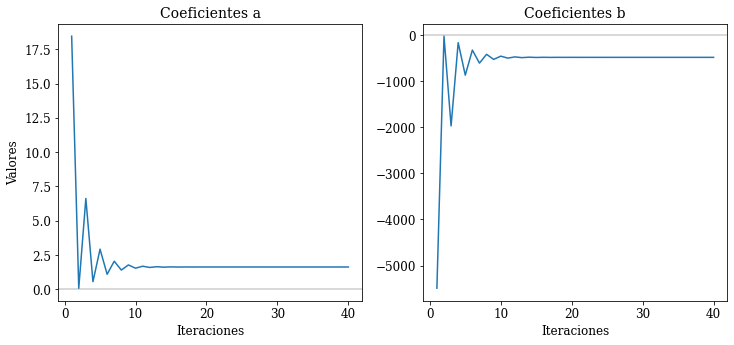

In [12]:
# Grafica
n_coefa = list_c_df['a_coef'][list_c_df['iter'] == n_iteraciones].values[0]
n_coefb = list_c_df['b_coef'][list_c_df['iter'] == n_iteraciones].values[0]
print(f'coef a: {n_coefa}\ncoef b: {n_coefb}')

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axs[0].plot(list_c_df['iter'], list_c_df['a_coef'])
axs[0].axhline(0, color='black', alpha=.2)
axs[0].set(title='Coeficientes a', ylabel='Valores', xlabel='Iteraciones')
axs[1].plot(list_c_df['iter'], list_c_df['b_coef'])
axs[1].axhline(0, color='black', alpha=.2)
axs[1].set(title='Coeficientes b',xlabel='Iteraciones');

#### 2022-06-14

In [10]:
# Procesando imagen 2022-06-14
pix_f_values = {'Albedo': 0.18027227029185394,
 'Elev_m': 45,
 'G': 66.47171582121297,
 'LAI': 1.2312135011441645,
 'NDVI': 0.535677137507801,
 'R_n': 459.141401665235,
 'SAVI': 0.3480963199786044,
 'Slope_d': 2.0841052532196045,
 'T_sw': 0.6590966639583984,
 'Ts_c': 24.02104843881108,
 'Ts_k': 297.17104843881106,
 'e_0': 0.9623121350114416}

pix_c_values = {'Albedo': 0.09296234673562581,
 'Elev_m': 45,
 'G': 99.75277671208718,
 'LAI': 0.30989732334047115,
 'NDVI': 0.104389721627409,
 'R_n': 504.447449401512,
 'SAVI': 0.04442048314401466,
 'Slope_d': 0,
 'T_sw': 0.6592193096535455,
 'Ts_c': 31.87732831242232,
 'Ts_k': 305.0273283124223,
 'e_0': 0.9530989732334046}

elev_station = 2.9 # m
dato_ws = 1.6      # km/hr
dato_et = 0.46     # mm/hr

n_iteraciones = 40

# Parte iterativa
list_f, list_c = parte_iterativa(n_iteraciones, 
                                 elev_station,
                                 pix_f_values, pix_c_values, 
                                 dato_ws, dato_et)

# Coeficientes
coef_a = list_f[-1]['a_coef']
coef_b = list_f[-1]['b_coef']
print(f'coef a: {coef_a}\ncoef b: {coef_b}')

# Resultados
list_f_df = pd.DataFrame(list_f)
list_c_df = pd.DataFrame(list_c)
display(list_c_df)

coef a: 0.36595126209164397
coef b: -107.25533162613517


,iter,Ts_k,Ts_dem,Z_om,u_200,u*,r_ah,air_dens_p,R_n,G,LE,H0,dT0,dT1,H1,a_coef,b_coef,L,y200m,yhz2,yhz1
0,1,305.027328,305.300978,0.005578,0.814686,0.031850,229.406205,1.185867,504.447449,99.752777,0.0,404.694673,77.976389,77.976389,404.694673,8.546761,-2531.357976,-0.007209,9.508072,7.041896,4.150293
1,2,305.027328,305.300978,0.005578,NaN,0.341136,0.744492,1.531096,NaN,NaN,NaN,NaN,0.195998,0.195998,404.694673,-0.001705,0.716510,-11.436126,2.961724,0.776559,0.066545
2,3,305.027328,305.300978,0.005578,NaN,0.044385,125.602839,1.140423,NaN,NaN,NaN,NaN,44.394291,44.394291,404.694673,4.955075,-1468.395026,-0.018762,8.593427,6.103793,3.275792
3,4,305.027328,305.300978,0.005578,NaN,0.176377,2.319458,1.333817,NaN,NaN,NaN,NaN,0.700945,0.700945,404.694673,0.009018,-2.052110,-1.376945,4.676894,2.171526,0.422443
4,5,305.027328,305.300978,0.005578,NaN,0.057488,52.891543,1.142316,NaN,NaN,NaN,NaN,18.663535,18.663535,404.694673,2.005975,-593.762709,-0.040832,7.858027,5.349159,2.600155
5,6,305.027328,305.300978,0.005578,NaN,0.127044,4.736784,1.213969,NaN,NaN,NaN,NaN,1.572786,1.572786,404.694673,0.066016,-18.581957,-0.468336,5.619194,3.079380,0.877485
6,7,305.027328,305.300978,0.005578,NaN,0.068615,28.217997,1.145598,NaN,NaN,NaN,NaN,9.928597,9.928597,404.694673,0.997356,-294.565122,-0.069629,7.358437,4.837277,2.162537
7,8,305.027328,305.300978,0.005578,NaN,0.106758,7.333491,1.178035,NaN,NaN,NaN,NaN,2.509263,2.509263,404.694673,0.150425,-43.415591,-0.269680,6.114438,3.573307,1.193851
8,9,305.027328,305.300978,0.005578,NaN,0.076387,19.677739,1.149144,NaN,NaN,NaN,NaN,6.902312,6.902312,404.694673,0.649348,-191.344292,-0.096364,7.056599,4.528757,1.909356
9,10,305.027328,305.300978,0.005578,NaN,0.097365,9.427250,1.166077,NaN,NaN,NaN,NaN,3.258753,3.258753,404.694673,0.227645,-66.241379,-0.202500,6.374443,3.835387,1.378023


In [15]:
display(list_f_df)

,iter,Ts_k,Ts_dem,Z_om,u_200,u*,r_ah,air_dens_p,R_n,G,LE,H0,dT0,dT1,H1,a_coef,b_coef,L,y200m,yhz2,yhz1
0,1,297.171048,297.444698,0.022162,0.814686,0.036675,199.229539,1.185867,459.141402,66.471716,327.944969,64.724717,10.830646,10.830646,64.724717,8.546761,-2531.357976,-0.067042,7.393719,4.873384,2.192731
1,2,297.171048,297.444698,0.022162,NaN,0.194880,3.943365,1.214068,NaN,NaN,NaN,NaN,0.209392,0.209392,64.724717,-0.001705,0.716510,-10.298263,3.041256,0.828620,0.073512
2,3,297.171048,297.444698,0.022162,NaN,0.055060,99.253361,1.170645,NaN,NaN,NaN,NaN,5.465833,5.465833,64.724717,4.955075,-1468.395026,-0.223956,6.282832,3.742869,1.311833
3,4,297.171048,297.444698,0.022162,NaN,0.118243,11.648108,1.191740,NaN,NaN,NaN,NaN,0.630101,0.630101,64.724717,0.009018,-2.052110,-2.258013,4.258095,1.790172,0.285714
4,5,297.171048,297.444698,0.022162,NaN,0.068876,52.808743,1.172306,NaN,NaN,NaN,NaN,2.904031,2.904031,64.724717,2.005975,-593.762709,-0.438997,5.676829,3.136426,0.911778
5,6,297.171048,297.444698,0.022162,NaN,0.097358,19.317394,1.181365,NaN,NaN,NaN,NaN,1.054146,1.054146,64.724717,0.066016,-18.581957,-1.249425,4.760250,2.249424,0.454400
6,7,297.171048,297.444698,0.022162,NaN,0.076832,38.116593,1.173985,NaN,NaN,NaN,NaN,2.093090,2.093090,64.724717,0.997356,-294.565122,-0.610237,5.384625,2.848667,0.745290
7,8,297.171048,297.444698,0.022162,NaN,0.089717,24.259479,1.178118,NaN,NaN,NaN,NaN,1.327483,1.327483,64.724717,0.150425,-43.415591,-0.975042,4.974415,2.452081,0.543945
8,9,297.171048,297.444698,0.022162,NaN,0.080813,32.825026,1.175070,NaN,NaN,NaN,NaN,1.800852,1.800852,64.724717,0.649348,-191.344292,-0.710750,5.250414,2.717850,0.675152
9,10,297.171048,297.444698,0.022162,NaN,0.086595,26.843088,1.176953,NaN,NaN,NaN,NaN,1.470313,1.470313,64.724717,0.227645,-66.241379,-0.875897,5.067669,2.541346,0.586293


coef a: 0.36599569088562045
coef b: -107.26854507143676


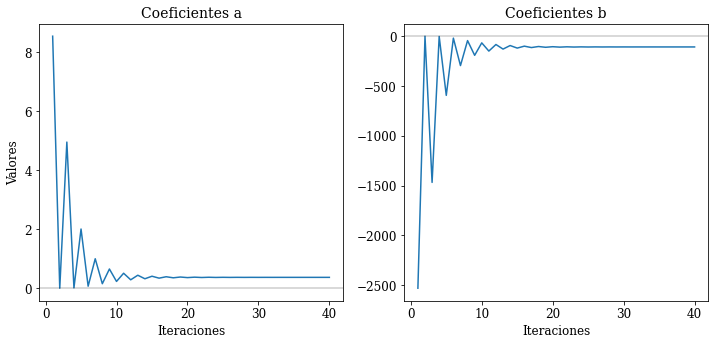

In [26]:
# Grafica
n_coefa = list_c_df['a_coef'][list_c_df['iter'] == n_iteraciones-1].values[0]
n_coefb = list_c_df['b_coef'][list_c_df['iter'] == n_iteraciones-1].values[0]
print(f'coef a: {n_coefa}\ncoef b: {n_coefb}')

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axs[0].plot(list_c_df['iter'], list_c_df['a_coef'])
axs[0].axhline(0, color='black', alpha=.2)
axs[0].set(title='Coeficientes a', ylabel='Valores', xlabel='Iteraciones')
axs[1].plot(list_c_df['iter'], list_c_df['b_coef'])
axs[1].axhline(0, color='black', alpha=.2)
axs[1].set(title='Coeficientes b',xlabel='Iteraciones');